In [1]:
#(this will take a few minutes to install all the dependences!)
!pip install deeplabcut
#!pip install git+https://github.com/DeepLabCut/DeepLabCut.git
!pip install --upgrade scikit-image
%reload_ext numpy
%reload_ext scipy
%reload_ext matplotlib
%reload_ext mpl_toolkits

!pip install git+https://github.com/aleju/imgaug.git

  Using cached scikit_image-0.18.1-cp39-cp39-manylinux1_x86_64.whl (28.9 MB)
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3
  Using cached scikit_image-0.19.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.0 MB)
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.1
    Uninstalling scikit-image-0.18.1:
      Successfully uninstalled scikit-image-0.18.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deeplabcut 2.2.1 requires scikit-image<=0.18.1,>=0.17, but you have scikit-image 0.19.3 which is incompatible.
  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-n9o8cgti
  Running command git clone -q https://github.com/aleju/imgaug.git /tmp/pip-req-build-n9o8cgti
  Res

In [2]:
# Importing the toolbox (takes several seconds) 

import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
#CHANGE 'video' and 'DLCscorer' based on the video analysis you want to plot
#CHANGE 'bpt' if you would like to analyze a different body part
#CHANGE 'Dataframe' to read into the absolute path of your video in "_filtered.h5" format
video='snrbaseline_3901_f_Trial1.mp4'

DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'

#dataname = str(Path(video).stem) + DLCscorer + '.h5'

bpt = 'snout'

#loading output of DLC

Dataframe = pd.read_hdf('/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrbaseline_3901_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5')

In [4]:
#Removes the weird tail of 0.000000 values. Don't worry, it won't mess anything up - see the last frame
#  with real data and compare the index.
Dataframe = Dataframe[Dataframe[DLCscorer][bpt]['likelihood'] != 0]

Dataframe

scorer    DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000             \
bodyparts                                                      tl              
coords                                                          x          y   
0                                                  16.335587       32.304123   
1                                                  16.467541       32.417416   
2                                                  16.491171       32.600456   
3                                                  16.491171       32.600456   
4                                                  16.740164       32.686348   
...                                                      ...             ...   
45016                                             327.239227       39.841618   
45017                                             327.681091       39.873505   
45018                                             327.681793       39.977539   
45019                                             327.681793       39.977539   
45020                                             327.681793       39.660614   

scorer                                                               \
bodyparts                      tr                                bl   
coords    likelihood            x          y likelihood           x   
0           0.149340  1126.465210  41.751762   0.023850    3.293753   
1           0.246842  1126.555176  41.751762   0.022840    3.618218   
2           0.179940  1127.084106  41.872337   0.070551    3.618218   
3           0.313029  1127.084106  42.276016   0.025804    3.396563   
4           0.640304  1127.517090  44.159752   0.091710    3.618218   
...              ...          ...        ...        ...         ...   
45016       0.999154  1128.872803  45.318493   0.992676  332.717407   
45017       0.999304  1128.872803  46.244175   0.995590  332.536591   
45018       0.999367  1128.872803  46.244175   0.993030  332.536560   
45019       0.999211  1128.872803  46.244175   0.995122  332.412506   
45020       0.999274  1128.841675  46.204170   0.994138  331.979187   

scorer                                         ...                            \
bodyparts                                  br  ... left_backpaw    tail_base   
coords              y likelihood            x  ...   likelihood            x   
0          489.578583   0.102480  1126.197632  ...     0.976362   505.173584   
1          489.684326   0.144502  1126.557495  ...     0.964247   505.173584   
2          489.750702   0.126053  1126.625977  ...     0.970517   505.173584   
3          489.841919   0.100322  1127.193604  ...     0.954993   502.986267   
4          489.841919   0.114440  1127.508301  ...     0.971660   502.745697   
...               ...        ...          ...  ...          ...          ...   
45016      688.755920   0.998304  1126.346802  ...     0.991175  1027.949341   
45017      688.755920   0.998822  1126.346802  ...     0.997399  1027.846924   
45018      688.755920   0.998052  1126.346802  ...     0.998242  1027.949341   
45019      688.631165   0.998836  1126.346802  ...     0.997937  1027.690308   
45020      687.867615   0.999290  1126.290649  ...     0.998258  1027.640625   

scorer                                                               \
bodyparts                           tail_mid                          
coords              y likelihood           x           y likelihood   
0          655.024170   0.954958  301.615051  114.296112   0.643392   
1          655.024170   0.946298  301.740723  114.296112   0.759039   
2          655.024170   0.942785  301.823181  114.401611   0.870069   
3          653.262329   0.976676  301.823181  114.401611   0.836634   
4          652.633179   0.992352  302.098724  114.296112   0.958654   
...               ...        ...         ...         ...        ...   
45016       76.271812   0.999704  962.572937   49.230621   0.988124   
45017       76.271812   0.999766  962.821411   49.353

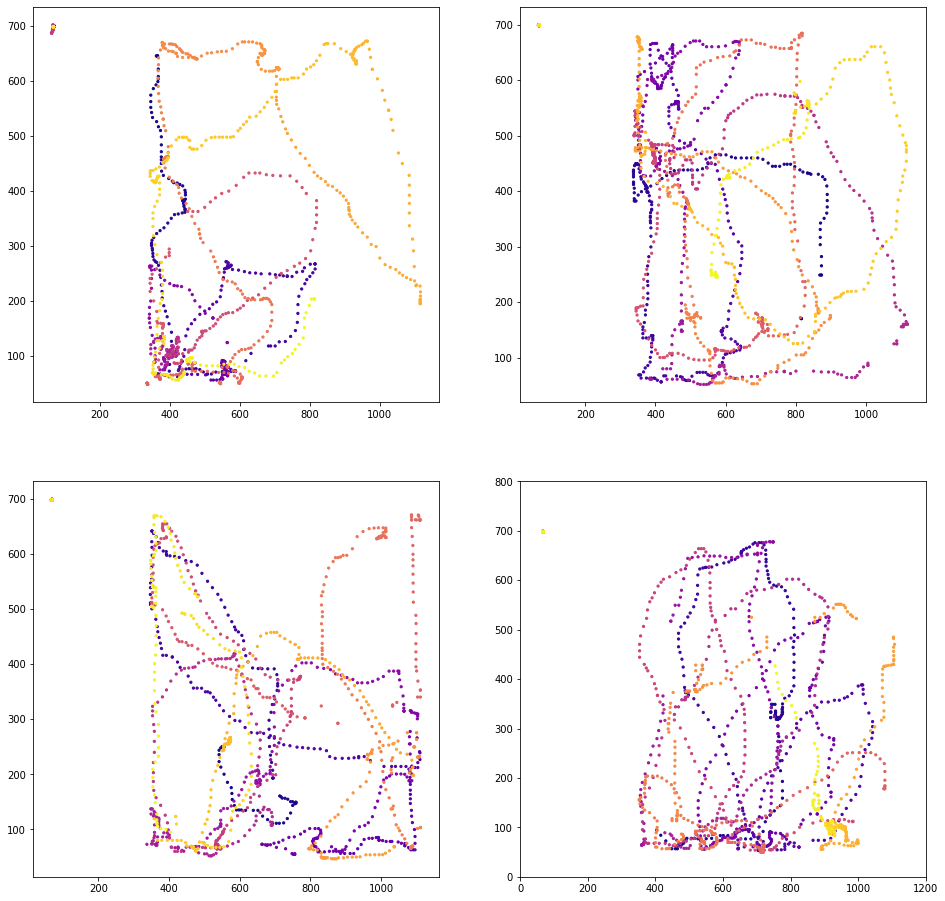

In [16]:
import math

fps = 25
fpm = fps * 60
numFramesTotal = len(Dataframe.index)
minutesTotal = math.floor(numFramesTotal / fpm) #gets number of minutes in the video, rounded down to plot each one

ten_min_increments = minutesTotal / 10

numColumns = 2

numRows = math.ceil(ten_min_increments / numColumns)

# If you want to "zoom in" on the mouse in each time interval, set sharex=False, sharey=False
# For equal scaling in all subplots, set sharex=True, sharey=True
fig, axs = plt.subplots(numRows, numColumns, sharex=False, sharey=False, figsize=(16,16)) 
plt.xlim(0, 1200)
plt.ylim(0, 800)

lowIndex = 0
highIndex = fpm
for n, ax in enumerate(axs.flatten()):
  subDf = Dataframe[lowIndex:highIndex]
  sub_xsnout = subDf[DLCscorer][bpt]['x'].values
  sub_ysnout = subDf[DLCscorer][bpt]['y'].values

  ax.scatter(sub_xsnout,sub_ysnout, s=5, c=subDf.index.values, cmap='plasma')
  plt.gca().invert_yaxis()

  lowIndex += fpm
  highIndex += fpm

for a in fig.axes:
    a.tick_params(
    axis='both',           # changes apply to the x-axis
    which='both',       # both major and minor ticks are affected
    bottom=True,
    top=False,
    left=True,
    right=False,
    labelleft=True,
    labelbottom=True)    # labels along the bottom edge are on
    
    
plt.show()

#BASELINE IS SHOWN BELOW

In [22]:
video='snrround2ffz_3901_f_Trial2.mp4'

DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'

#dataname = str(Path(video).stem) + DLCscorer + '.h5'

bpt = 'snout'

#loading output of DLC

Dataframe = pd.read_hdf('snrround2ffz_3901_f_Trial2DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5')

In [23]:
Dataframe = Dataframe[Dataframe[DLCscorer][bpt]['likelihood'] != 0]

Dataframe

scorer    DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000             \
bodyparts                                                      tl              
coords                                                          x          y   
0                                                 326.339966       37.041790   
1                                                 326.339966       37.041790   
2                                                 326.339966       37.041790   
3                                                 326.211182       37.039204   
4                                                 326.211182       37.039204   
...                                                      ...             ...   
135057                                            326.858276       37.211914   
135058                                            326.858276       37.211914   
135059                                            326.858276       37.211914   
135060                                            326.629303       36.989326   
135061                                            326.386353       36.738052   

scorer                                                               \
bodyparts                      tr                                bl   
coords    likelihood            x          y likelihood           x   
0           0.998573  1125.562256  41.160984   0.985137  329.008331   
1           0.998906  1125.747192  41.397263   0.994323  329.054352   
2           0.999120  1125.773682  41.769775   0.995292  329.054352   
3           0.999275  1125.747192  41.896259   0.998376  329.008331   
4           0.998975  1125.562256  41.905403   0.997995  328.553406   
...              ...          ...        ...        ...         ...   
135057      0.999266  1126.242310  40.256424   0.985800  328.407410   
135058      0.999327  1126.242310  40.256424   0.988477  328.407410   
135059      0.999014  1126.255981  40.169823   0.990049  328.428284   
135060      0.999473  1126.036133  39.246716   0.991177  328.428284   
135061      0.999298  1125.847168  39.196182   0.994499  328.397308   

scorer                                         ...                           \
bodyparts                                  br  ... left_backpaw   tail_base   
coords              y likelihood            x  ...   likelihood           x   
0          682.289917   0.997695  1122.348267  ...     0.706370  527.451538   
1          682.332764   0.997697  1122.538208  ...     0.849042  527.833557   
2          682.349060   0.998641  1122.750854  ...     0.857948  527.833557   
3          682.349060   0.999130  1123.482666  ...     0.900778  527.833557   
4          682.340210   0.999561  1123.482666  ...     0.859801  527.833557   
...               ...        ...          ...  ...          ...         ...   
135057     681.959656   0.999249  1123.830811  ...     0.992400  680.319153   
135058     681.959656   0.999327  1123.830811  ...     0.981133  674.993286   
135059     681.959656   0.999588  1123.830811  ...     0.823374  669.037170   
135060     681.959656   0.999550  1123.673950  ...     0.861318  662.646851   
135061     681.959656   0.999426  1123.502808  ...     0.833724  653.039490   

scorer                                                               \
bodyparts                           tail_mid                          
coords              y likelihood           x           y likelihood   
0          641.365967   0.997741  456.647888  622.077454   0.841947   
1          641.910522   0.998545  459.749664  622.566895   0.897068   
2          641.939758   0.997419  459.749664  622.569702   0.909124   
3          641.939758   0.999053  459.837585  622.798767   0.928731   
4          642.633606   0.999017  459.749664  624.537292   0.969069   
...               ...        ...         ...         ...        ...   
135057     106.570023   0.999355  743.355774  144.437424   0.999158   
135058     104.701309   0.996317  737.112183  141.120621   0.998997

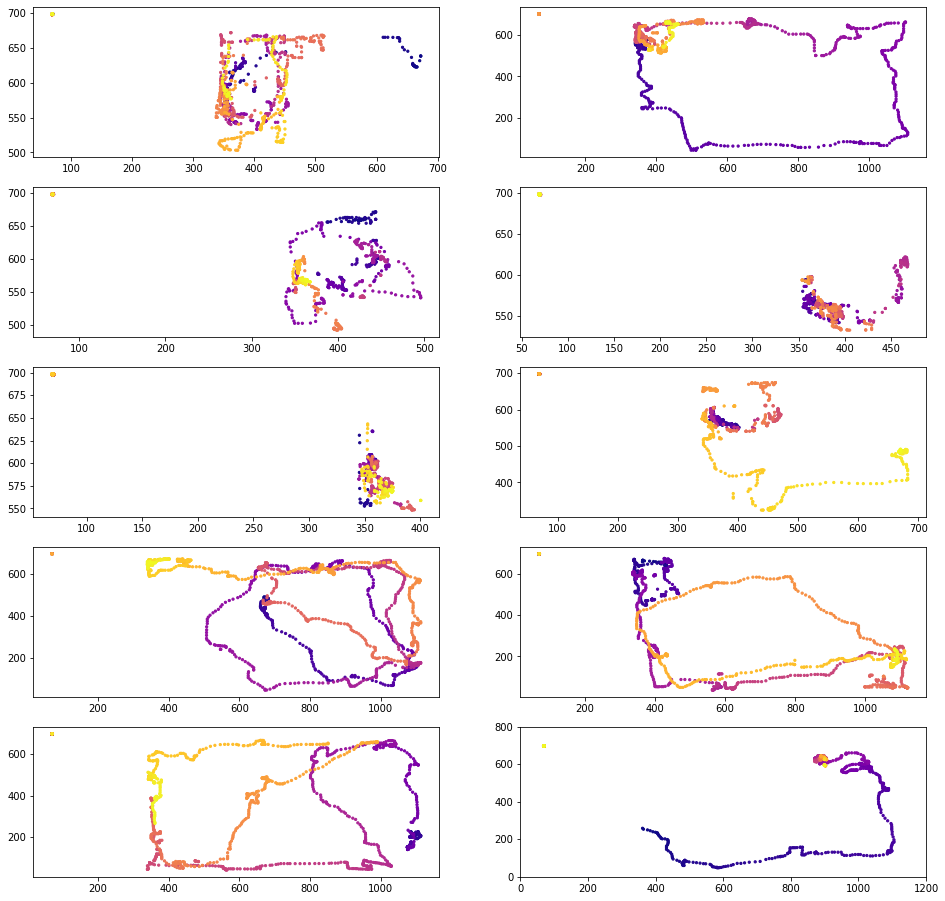

In [24]:
import math



fps = 25
fpm = fps * 60
numFramesTotal = len(Dataframe.index)
minutesTotal = math.floor(numFramesTotal / fpm) #gets number of minutes in the video, rounded down to plot each one

ten_min_increments = minutesTotal / 10

numColumns = 2

numRows = math.ceil(ten_min_increments / numColumns)

# If you want to "zoom in" on the mouse in each time interval, set sharex=False, sharey=False
# For equal scaling in all subplots, set sharex=True, sharey=True
fig, axs = plt.subplots(numRows, numColumns, sharex=False, sharey=False, figsize=(16,16)) 
plt.xlim(0, 1200)
plt.ylim(0, 800)

lowIndex = 0
highIndex = fpm
for n, ax in enumerate(axs.flatten()):
  subDf = Dataframe[lowIndex:highIndex]
  sub_xsnout = subDf[DLCscorer][bpt]['x'].values
  sub_ysnout = subDf[DLCscorer][bpt]['y'].values

  ax.scatter(sub_xsnout,sub_ysnout, s=5, c=subDf.index.values, cmap='plasma')
  plt.gca().invert_yaxis()

  lowIndex += fpm
  highIndex += fpm

for a in fig.axes:
    a.tick_params(
    axis='both',           # changes apply to the x-axis
    which='both',       # both major and minor ticks are affected
    bottom=True,
    top=False,
    left=True,
    right=False,
    labelleft=True,
    labelbottom=True)    # labels along the bottom edge are on
    
    
plt.show()

#FFZ IS SHOWN BELOW

In [48]:
hdf_path = '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrbaseline_3901_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5'
Dataframe = pd.read_hdf(hdf_path)

DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'
bpt = 'snout'

x_snout = Dataframe[DLCscorer][bpt]['x'].values
y_snout = Dataframe[DLCscorer][bpt]['y'].values

from mpl_toolkits.mplot3d import proj3d

def make_get_proj(self, rx, ry, rz):
    '''
    Return a variation on :func:`~mpl_toolkit.mplot2d.axes3d.Axes3D.getproj` that
    makes the box aspect ratio equal to *rx:ry:rz*, using an axes object *self*.
    '''

    rm = max(rx, ry, rz)
    kx = rm / rx; ky = rm / ry; kz = rm / rz;

    # Copied directly from mpl_toolkit/mplot3d/axes3d.py. New or modified lines are
    # marked by ##
    def get_proj():
        relev, razim = np.pi * self.elev/180, np.pi * self.azim/180

        xmin, xmax = self.get_xlim3d()
        ymin, ymax = self.get_ylim3d()
        zmin, zmax = self.get_zlim3d()

        # transform to uniform world coordinates 0-1.0,0-1.0,0-1.0
        worldM = proj3d.world_transformation(xmin, xmax,
                                             ymin, ymax,
                                             zmin, zmax)

        # adjust the aspect ratio                          ##
        aspectM = proj3d.world_transformation(-kx + 1, kx, ##
                                              -ky + 1, ky, ##
                                              -kz + 1, kz) ##

        # look into the middle of the new coordinates
        R = np.array([0.5, 0.5, 0.5])

        xp = R[0] + np.cos(razim) * np.cos(relev) * self.dist
        yp = R[1] + np.sin(razim) * np.cos(relev) * self.dist
        zp = R[2] + np.sin(relev) * self.dist
        E = np.array((xp, yp, zp))

        self.eye = E
        self.vvec = R - E
        self.vvec = self.vvec / proj3d.mod(self.vvec)

        if abs(relev) > np.pi/2:
            # upside down
            V = np.array((0, 0, -1))
        else:
            V = np.array((0, 0, 1))
        zfront, zback = -self.dist, self.dist

        viewM = proj3d.view_transformation(E, R, V)
        perspM = proj3d.persp_transformation(zfront, zback)
        M0 = np.dot(viewM, np.dot(aspectM, worldM)) ##
        M = np.dot(perspM, M0)
        return M
    return get_proj

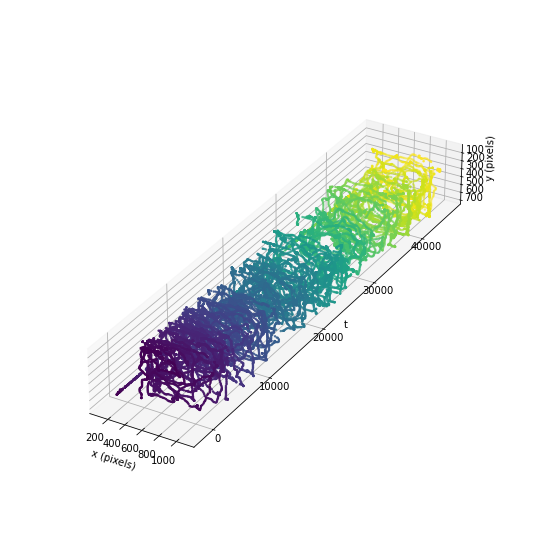

In [49]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(x_snout, Dataframe.index.values, y_snout, s=2, c= Dataframe.index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')


ax.set_box_aspect(((x_snout.max() - x_snout.min()), 5000, (y_snout.max() - y_snout.min())))

#BASELINE IS SHOWN BELOW

In [50]:
hdf_path = '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrbaseline_3901_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5'
Dataframe = pd.read_hdf(hdf_path)

DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'
bpt = 'snout'

x_snout = Dataframe[DLCscorer][bpt]['x'].values
y_snout = Dataframe[DLCscorer][bpt]['y'].values

ValueError: zero-size array to reduction operation maximum which has no identity

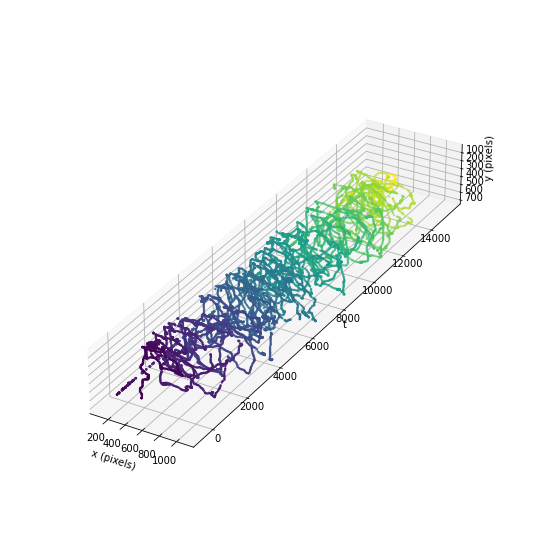

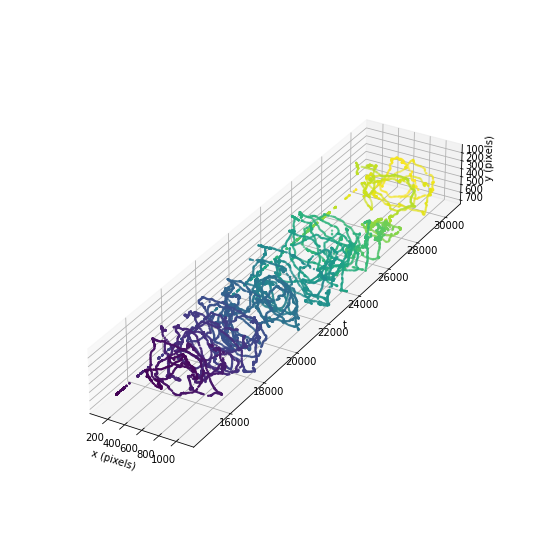

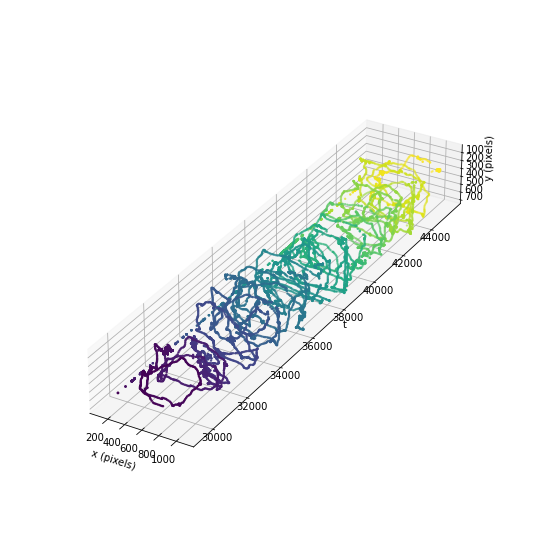

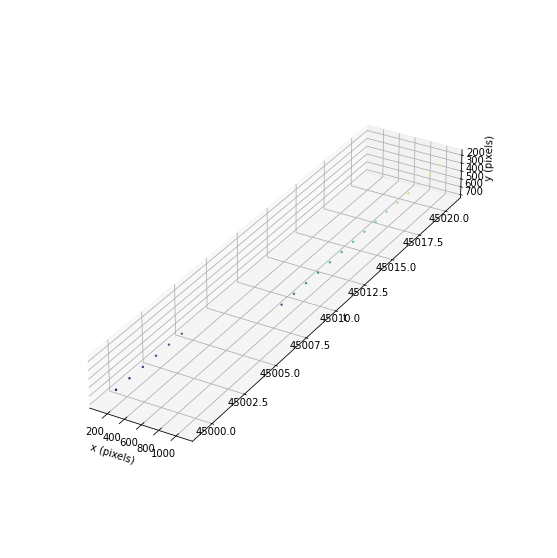

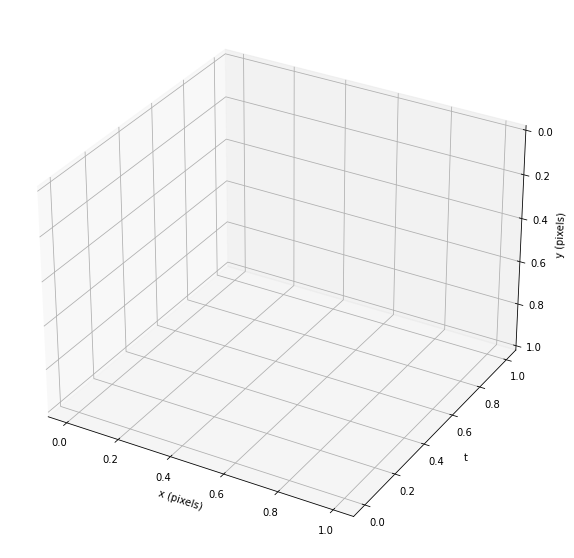

In [51]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[0:15000]
ysnout10min = y_snout[0:15000]

ax.scatter3D(xsnout10min, Dataframe[0:15000].index.values, ysnout10min, s=2, c= Dataframe[0:15000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[15000:30000]
ysnout10min = y_snout[15000:30000]

ax.scatter3D(xsnout10min, Dataframe[15000:30000].index.values, ysnout10min, s=2, c= Dataframe[15000:30000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[30000:45000]
ysnout10min = y_snout[30000:45000]

ax.scatter3D(xsnout10min, Dataframe[30000:45000].index.values, ysnout10min, s=2, c= Dataframe[30000:45000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[45000:60000]
ysnout10min = y_snout[45000:60000]

ax.scatter3D(xsnout10min, Dataframe[45000:60000].index.values, ysnout10min, s=2, c= Dataframe[45000:60000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[60000:75000]
ysnout10min = y_snout[60000:75000]

ax.scatter3D(xsnout10min, Dataframe[60000:75000].index.values, ysnout10min, s=2, c= Dataframe[60000:75000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[75000:90000]
ysnout10min = y_snout[75000:90000]

ax.scatter3D(xsnout10min, Dataframe[75000:90000].index.values, ysnout10min, s=2, c= Dataframe[75000:90000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[90000:105000]
ysnout10min = y_snout[90000:105000]

ax.scatter3D(xsnout10min, Dataframe[90000:105000].index.values, ysnout10min, s=2, c= Dataframe[90000:105000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[105000:120000]
ysnout10min = y_snout[105000:120000]

ax.scatter3D(xsnout10min, Dataframe[105000:120000].index.values, ysnout10min, s=2, c= Dataframe[105000:120000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[120000:135000]
ysnout10min = y_snout[120000:135000]

ax.scatter3D(xsnout10min, Dataframe[120000:135000].index.values, ysnout10min, s=2, c= Dataframe[120000:135000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

#BASELINE IS SHOWN BELOW

In [52]:
hdf_path = '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrround2ffz_3901_f_Trial2DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5'
Dataframe = pd.read_hdf(hdf_path)

DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'
bpt = 'snout'

x_snout = Dataframe[DLCscorer][bpt]['x'].values
y_snout = Dataframe[DLCscorer][bpt]['y'].values

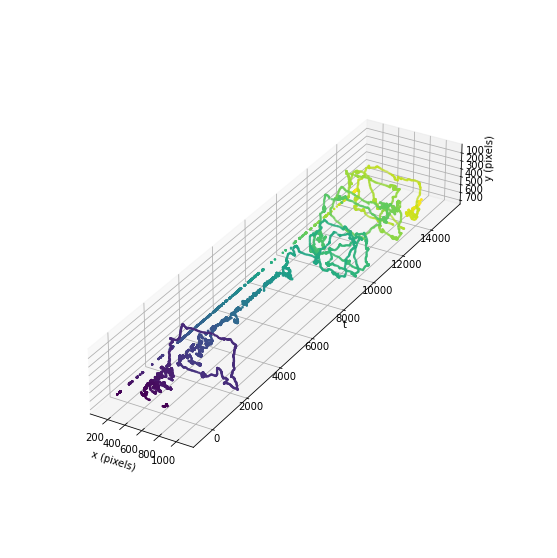

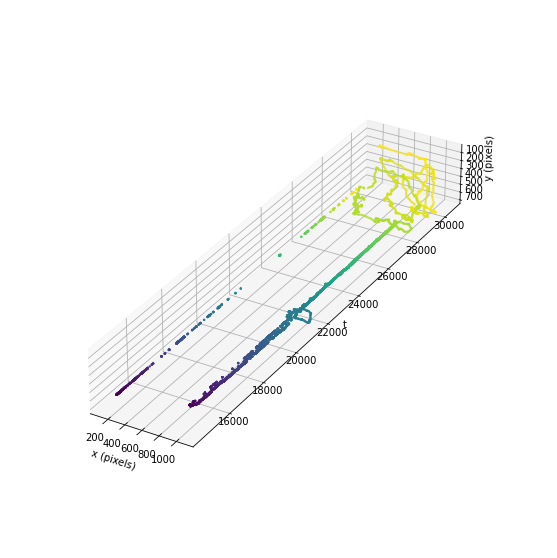

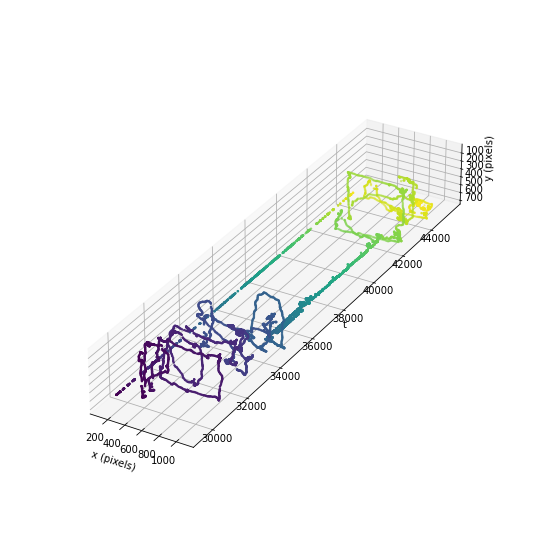

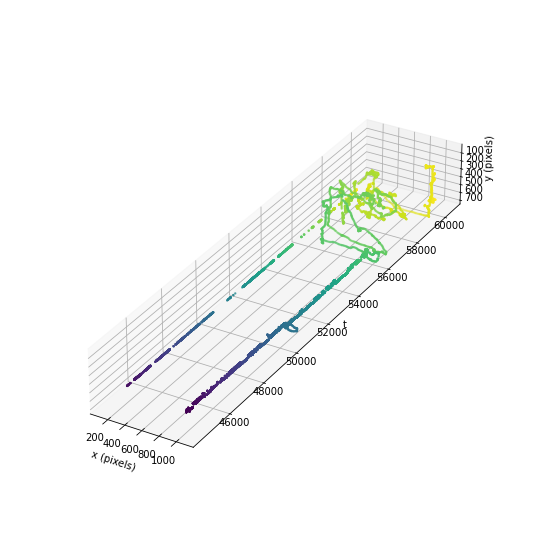

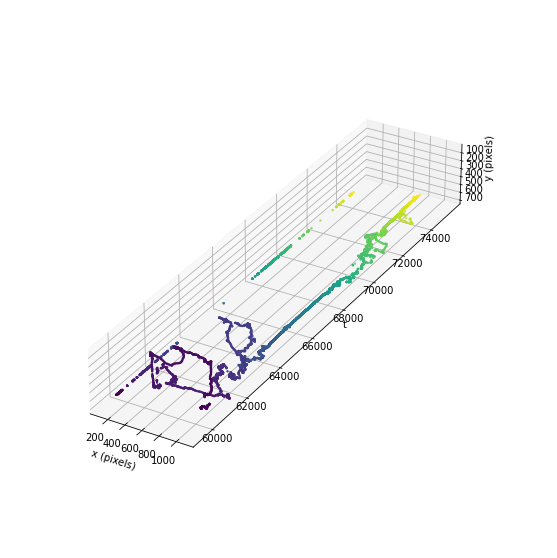

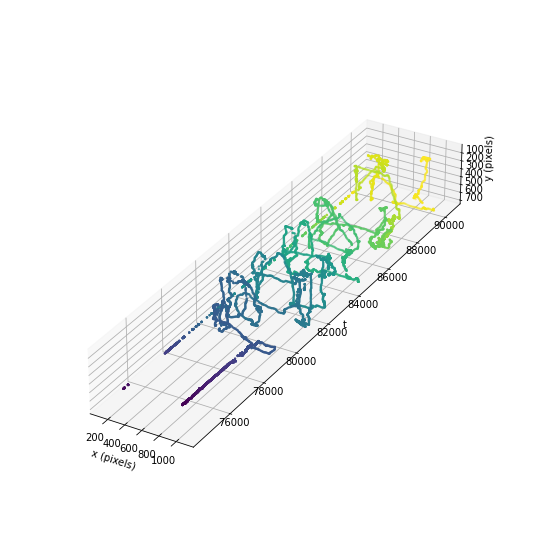

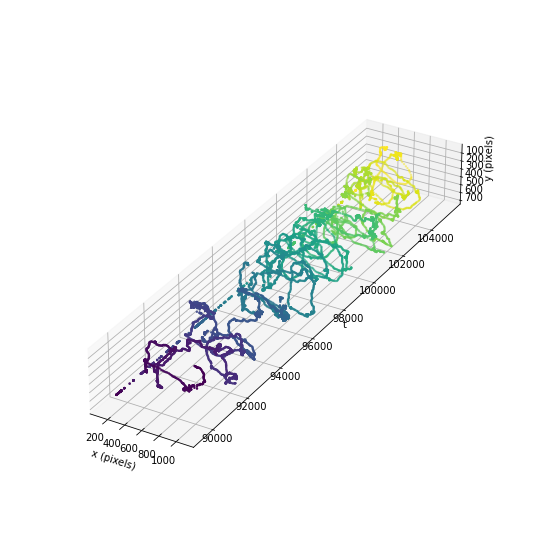

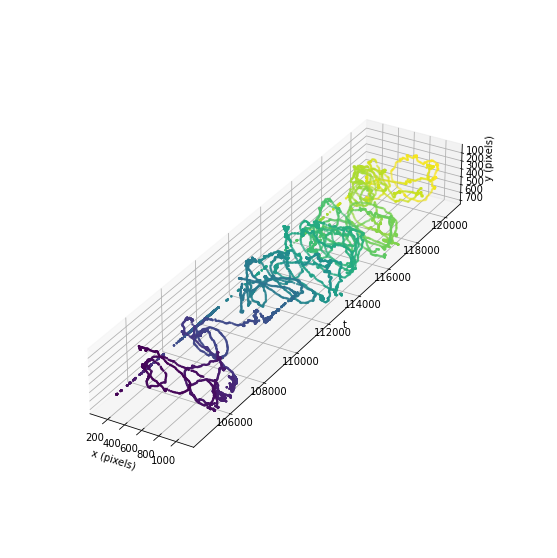

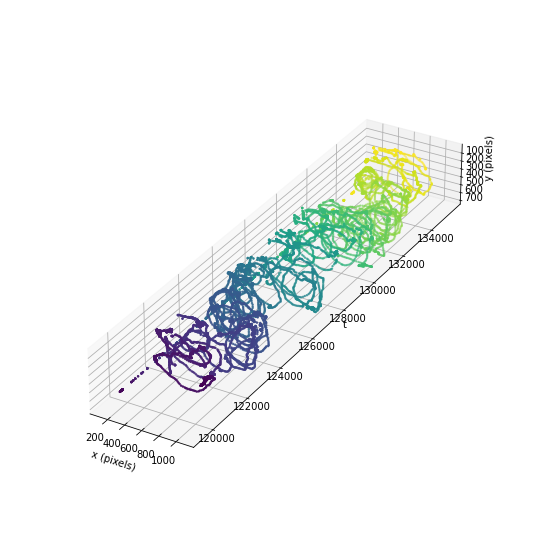

In [53]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[0:15000]
ysnout10min = y_snout[0:15000]

ax.scatter3D(xsnout10min, Dataframe[0:15000].index.values, ysnout10min, s=2, c= Dataframe[0:15000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[15000:30000]
ysnout10min = y_snout[15000:30000]

ax.scatter3D(xsnout10min, Dataframe[15000:30000].index.values, ysnout10min, s=2, c= Dataframe[15000:30000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[30000:45000]
ysnout10min = y_snout[30000:45000]

ax.scatter3D(xsnout10min, Dataframe[30000:45000].index.values, ysnout10min, s=2, c= Dataframe[30000:45000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[45000:60000]
ysnout10min = y_snout[45000:60000]

ax.scatter3D(xsnout10min, Dataframe[45000:60000].index.values, ysnout10min, s=2, c= Dataframe[45000:60000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[60000:75000]
ysnout10min = y_snout[60000:75000]

ax.scatter3D(xsnout10min, Dataframe[60000:75000].index.values, ysnout10min, s=2, c= Dataframe[60000:75000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[75000:90000]
ysnout10min = y_snout[75000:90000]

ax.scatter3D(xsnout10min, Dataframe[75000:90000].index.values, ysnout10min, s=2, c= Dataframe[75000:90000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[90000:105000]
ysnout10min = y_snout[90000:105000]

ax.scatter3D(xsnout10min, Dataframe[90000:105000].index.values, ysnout10min, s=2, c= Dataframe[90000:105000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[105000:120000]
ysnout10min = y_snout[105000:120000]

ax.scatter3D(xsnout10min, Dataframe[105000:120000].index.values, ysnout10min, s=2, c= Dataframe[105000:120000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[120000:135000]
ysnout10min = y_snout[120000:135000]

ax.scatter3D(xsnout10min, Dataframe[120000:135000].index.values, ysnout10min, s=2, c= Dataframe[120000:135000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

#FFZ IS SHOWN BELOW